In [1]:
using Plots, NearestNeighbors, Slepians
import Slepians: get_quadrature_nodes_2D
include("../src/relevant_slepian_alpha.jl")

get_quadrature_nodes_2D (generic function with 3 methods)

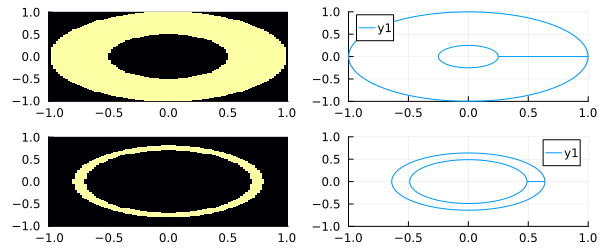

In [2]:
t1 = t2 = LinRange(-1, 1, 100)

mask = broadcast(+, t1'.^2, t2.^2) .< 1.0
mask .-= broadcast(+, t1'.^2, t2.^2) .< 0.5^2

mask2 = broadcast(+, t1'.^2, t2.^2) .< 0.8^2
mask2 .-= broadcast(+, t1'.^2, t2.^2) .< 0.7^2

p1a = heatmap(t1, t2, mask, colorbar = false)
p1b = heatmap(t1, t2, mask2, colorbar = false)

t = 2*LinRange(-pi, pi, 100)
x = vcat(cos.(t), 0.5^2*cos.(t[end:-1:1]))
y = vcat(sin.(t), 0.5^2*sin.(t[end:-1:1]))

x2 = vcat(0.8^2*cos.(t), 0.7^2*cos.(t[end:-1:1]))
y2 = vcat(0.8^2*sin.(t), 0.7^2*sin.(t[end:-1:1]))

p2a = plot(x,y, xlims=(-1,1), ylims = (-1, 1))
p2b = plot(x2,y2, xlims=(-1,1), ylims = (-1, 1))

plot(p1a, p2a, p1b, p2b, size = (600, 250))

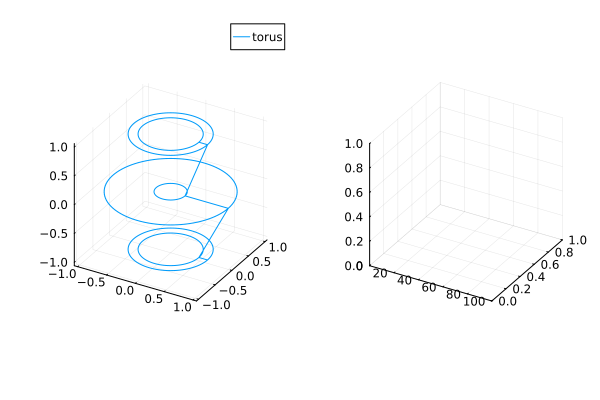

In [3]:
z = collect(-1:1)

z = broadcast(*, z', ones(200))[:]

pts = hcat(z, vcat(y2, y, y2), vcat(x2, x, x2))

pcont = plot(pts[:,3], pts[:,2], pts[:,1], label = "torus")
pmask = heatmap(Float64.([mask2;;; mask;;; mask2]), colorbar = true)

plot(pcont, pmask)

In [4]:
m3 = [mask2;;; mask;;; mask2]

100×100×3 BitArray{3}:
[:, :, 1] =
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

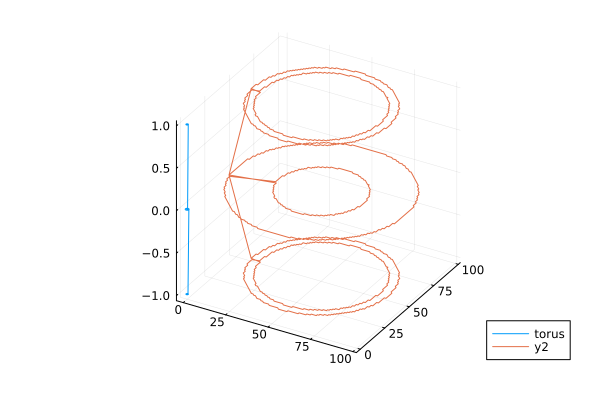

In [5]:
xc1, yc1 = Slepians.mask2closedcurve(mask2)
xc2, yc2 = Slepians.mask2closedcurve(mask)

xc = vcat(xc1, xc2, xc1)
yc = vcat(yc1, yc2, yc1)

curve = hcat(xc, yc, vcat(ones(length(xc1)), zeros(length(xc2)), -ones(length(xc1))))

plot!(pcont, curve[:,1], curve[:,2], curve[:,3])